# Imports

In [1]:
PROJECT_DIR = "/Users/pluz999/Documents/Oxford/Thesis/queue-value"

import sys
sys.path.append(PROJECT_DIR)

from datetime import datetime
from tqdm import tqdm
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from micro_price.ImbalancePriceDeltaMicroPrice import ImbalancePriceDeltaMicroPrice
from orderbook_aggregator.ImbalancePriceDeltaAggregator import ImbalancePriceDeltaAggregator

# Global variables

In [2]:
csco_ticker = "CSCO"
csco_levels = 5
csco_start_date = datetime(2019,1,2)
csco_end_date = datetime(2019,1,31)

bac_ticker = "BAC"
bac_levels = 10
bac_start_date = datetime(2019,11,1)
bac_end_date = datetime(2019,11,29)

# Load and process order book data

In [3]:
csco_orderbooks: List[ImbalancePriceDeltaAggregator] = []
for d in tqdm(pd.date_range(csco_start_date, csco_end_date)):
    try:
        csco_orderbooks.append(ImbalancePriceDeltaAggregator(d, csco_ticker, csco_levels, spread_size=100))
    except FileNotFoundError:
        continue
        
csco_microprice = ImbalancePriceDeltaMicroPrice(csco_orderbooks)

100%|██████████| 30/30 [12:12<00:00, 24.43s/it]  


In [4]:
bac_orderbooks: List[ImbalancePriceDeltaAggregator] = []
for d in tqdm(pd.date_range(bac_start_date, bac_end_date)):
    try:
        bac_orderbooks.append(ImbalancePriceDeltaAggregator(d, bac_ticker, bac_levels, spread_size=100))
    except FileNotFoundError:
        continue
        
bac_microprice = ImbalancePriceDeltaMicroPrice(bac_orderbooks)

100%|██████████| 29/29 [06:22<00:00, 13.21s/it]


# Calculate micro-price

In [6]:
csco_microprice_df = csco_microprice.calculate_micro_price()

In [7]:
bac_microprice_df = bac_microprice.calculate_micro_price()

# Plot micro-price

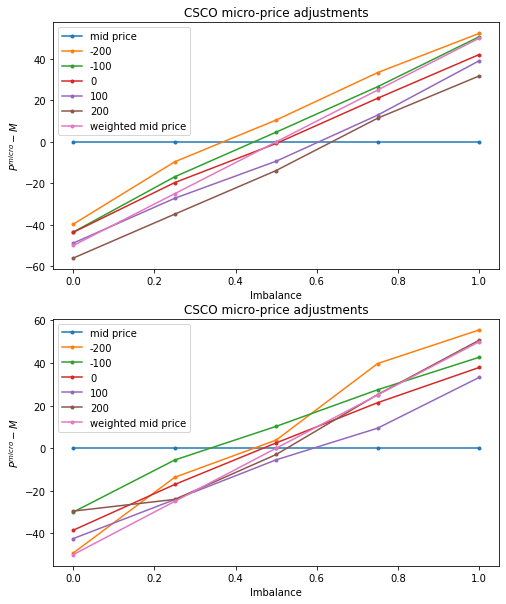

In [8]:
fig, ax = plt.subplots(2, figsize=(8,10))

ax[0].plot(csco_microprice_df.index, np.repeat(0,len(csco_microprice_df.index)), ".-")
ax[0].plot(csco_microprice_df, ".-")
ax[0].plot(csco_microprice_df.index, np.linspace(-50,50,len(csco_microprice_df.index)), ".-")
ax[0].set_xlabel("Imbalance")
ax[0].set_ylabel("$P^{micro} - M$")
ax[0].set_title("CSCO micro-price adjustments")
ax[0].legend(["mid price"] + list(csco_microprice_df.columns) + ["weighted mid price"], loc="upper left")

ax[1].plot(bac_microprice_df.index, np.repeat(0,len(bac_microprice_df.index)), ".-")
ax[1].plot(bac_microprice_df, ".-")
ax[1].plot(bac_microprice_df.index, np.linspace(-50,50,len(bac_microprice_df.index)), ".-")
ax[1].set_xlabel("Imbalance")
ax[1].set_ylabel("$P^{micro} - M$")
ax[1].set_title("CSCO micro-price adjustments")
ax[1].legend(["mid price"] + list(bac_microprice_df.columns) + ["weighted mid price"], loc="upper left")

plt.show()

In [9]:
csco_example_plot = csco_orderbooks[0].orderbook.iloc[14000:17000].copy()
csco_example_micro_prices = [
    csco_microprice_df.loc[imbalance, mid_price_delta] 
    for imbalance, mid_price_delta in zip(csco_example_plot["imbalance"], csco_example_plot["mid_price_delta"])
]
csco_example_plot["micro_price"] = csco_example_micro_prices

bac_example_plot = bac_orderbooks[0].orderbook.iloc[14000:17000].copy()
bac_example_micro_prices = [
    bac_microprice_df.loc[imbalance, mid_price_delta] 
    for imbalance, mid_price_delta in zip(bac_example_plot["imbalance"], bac_example_plot["mid_price_delta"])
]
bac_example_plot["micro_price"] = bac_example_micro_prices

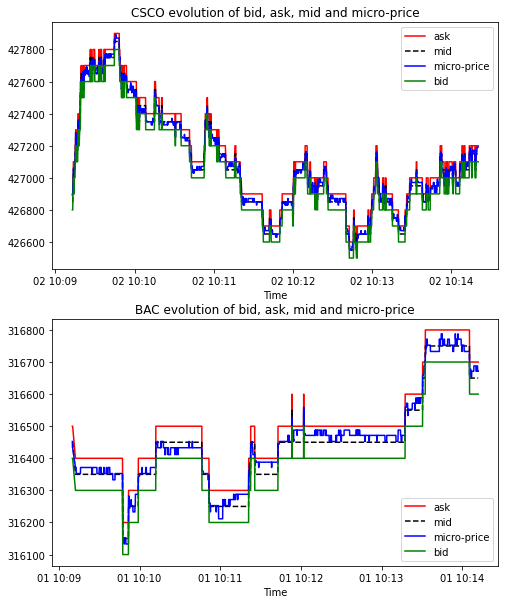

In [13]:
fig, ax = plt.subplots(2, figsize=(8,10))

ax[0].plot(csco_example_plot["ask_price_0"], "r")
ax[0].plot(csco_example_plot["mid_price"], "k--")
ax[0].plot(csco_example_plot["mid_price"] + csco_example_plot["micro_price"], "b")
ax[0].plot(csco_example_plot["bid_price_0"], "g")
ax[0].set_title("CSCO evolution of bid, ask, mid and micro-price")
ax[0].set_xlabel("Time")
ax[0].legend(["ask", "mid", "micro-price", "bid"], loc="upper right")

ax[1].plot(bac_example_plot["ask_price_0"], "r")
ax[1].plot(bac_example_plot["mid_price"], "k--")
ax[1].plot(bac_example_plot["mid_price"] + bac_example_plot["micro_price"], "b")
ax[1].plot(bac_example_plot["bid_price_0"], "g")
ax[1].set_title("BAC evolution of bid, ask, mid and micro-price")
ax[1].set_xlabel("Time")
ax[1].legend(["ask", "mid", "micro-price", "bid"], loc="lower right")

plt.show()